# Hackday 5º Edição - Problema de negócio

A InStyle é uma das maiores lojas de roupas dos Estados Unidos que passa por problemas de customer experience ou experiência do cliente.

O grande desafio de escalar o faturamento de uma loja é manter a qualidade do produto e a taxa de satisfação do cliente em alta.

À medida que a empresa alcance mais clientes, os processos internos de vendas que começa com a concepção do produto, passam pela divulgação do marketing e chegam até os sistemas de pagamento do financeiro começam a apresentar problemas.

O time de produtos tem dificuldade em determinar a necessidade da maioria dos clientes. O time de marketing enfrente desafios para determinar o cliente ideal e o time de desenvolvimento sofre com os grandes volumes de acessos no site e em seu aplicativo, causando quedas de sistema e tornando o site inoperante por algumas horas, impedindo as pessoas de comprar e assim, gerando muitas reclamações no atendimento, liderado pelo time de customer experience.

Portanto, a medição da satisfação dos clientes é extremamente importante para a empresa manter a boa reputação no mercado.

Um time interdisciplinar chamado de “War Room”, formado por profissionais de Produto, Marketing, Design, Dados e Desenvolvimento foi montado para garantir uma ótima experiência de compra ao cliente e uma alta taxa de satisfação, mesmo com o crescimento rápido do volume de vendas.

Uma das primeiras ações emergenciais do War Room foi fazer um atendimento pessoal aos clientes. Porém, a dificuldade inicial era identificar quais clientes teriam um nível de satisfação “Satisfeito” ou “Neutro/Insatisfeito”, para que o time conseguisse entrar em contato somente com os clientes “Neutro/Insatisfeito”.

Os Cientistas de Dados do War Room ficaram com a tarefa de treinar um algoritmo para classificar os clientes de uma planilha em “Satisfeito” ou “Neutro/Insatisfeito”, prevendo quais clientes ficarão Insatisfeitos e portanto agindo rápido para entender o motivo da insatisfação e reverter o cenário do cliente.

## Os dados: 

- Gender: Gênero do cliente
- Age: Idade do cliente
- Type of Purchase: O tipo de compra
- Store size: O tamanho da loja
- Store distance: Distância até o centro da cidade
- InStore wifi: Nível de satisfação com o Wifi da Loja
- Open/Close time convenient: Nível de satisfação do horário de abertura e fechamento da loja
- Easy of online shopping: Nível de satisfação com a compra online
- Store location: Nível de satisfação com a acesso a loja
- Toilet cleaning:Nível de limpeza dos banheiros
- Dressing room: Nível de satisfação com o provador
- Waiting room: Nível de satisfação do local de espera dentro da loja.
- Kids entertainment: Nível de satisfação do espaço kids
- Seller service: Nível de satisfação com o atendimento dos vendedores
- Showroom: Nível de satisfação com a disposição das roupas no interior da loja
- Self-Store: Nível de satisfação com os guarda-volumes da loja
- Purchase service: Nível de satisfação do atendimento no pagamento
- Inflights Service: Store Service
- Cleanliness: Nível de satisfação com a limpeza da loja
- Carrier delay in minutes: Tempo de atraso do produto na saída da transportadora
- Delivery delay in minutes: Tempo de atraso na entrega do produto até a casa do cliente.

# Set up

### Libraries

In [177]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import numpy as np
import math


from matplotlib              import pyplot           as plt
from sklearn                 import ensemble         as en
from sklearn                 import model_selection  as ms

from IPython.display         import HTML
from dython                  import nominal
from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import  StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics         import make_scorer, accuracy_score
from sklearn.neighbors       import KNeighborsClassifier
from xgboost                 import XGBClassifier
from sklearn.metrics         import accuracy_score, recall_score, precision_score, balanced_accuracy_score, f1_score





### Functions

In [178]:

def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()


In [179]:
jupyter_settings()

### Import Data

In [180]:
df_train_raw = pd.read_csv('data/train.csv', low_memory=False)
df_test_raw = pd.read_csv('data/test.csv', low_memory=False)

## ETL

### Data Raw status

In [181]:
df1 = df_train_raw.copy()
df1test = df_test_raw.copy()

#### Dados

In [182]:
df1.head(5)

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   Gender                      103904 non-null  object 
 2   Customer Type               103904 non-null  object 
 3   Age                         103904 non-null  int64  
 4   Type of Purchase            103904 non-null  object 
 5   Store size                  103904 non-null  object 
 6   Store distance              103904 non-null  int64  
 7   InStore wifi                103904 non-null  int64  
 8   Open/Close time convenient  103904 non-null  int64  
 9   Easy of online shopping     103904 non-null  int64  
 10  Store location              103904 non-null  int64  
 11  Toilet cleaning             103904 non-null  int64  
 12  Dressing room               103904 non-null  int64  
 13  Waiting room  

In [184]:
df1test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          25976 non-null  int64  
 1   Gender                      25976 non-null  object 
 2   Customer Type               25976 non-null  object 
 3   Age                         25976 non-null  int64  
 4   Type of Purchase            25976 non-null  object 
 5   Store size                  25976 non-null  object 
 6   Store distance              25976 non-null  int64  
 7   InStore wifi                25976 non-null  int64  
 8   Open/Close time convenient  25976 non-null  int64  
 9   Easy of online shopping     25976 non-null  int64  
 10  Store location              25976 non-null  int64  
 11  Toilet cleaning             25976 non-null  int64  
 12  Dressing room               25976 non-null  int64  
 13  Waiting room                259

### Changes

In [185]:
df1.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction'],
      dtype='object')

In [186]:
old_columns_train = [ 'id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction' ]


old_columns_train = pd.Series(old_columns_train).apply(lambda x: x.strip().replace(' ', '_').lower())

# Rename
df1.columns = old_columns_train
df1 = df1.rename(columns={'self-store':'self_store'})

df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [187]:
old_columns_test = [ 'id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
   'Store size', 'Store distance', 'InStore wifi',
   'Open/Close time convenient', 'Easy of online shopping',
   'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
   'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
   'Purchase service', 'Store Service', 'Cleanliness',
   'Carrier delay in minutes', 'Delivery delay in minutes' ]


old_columns_test = pd.Series(old_columns_test).apply(lambda x: x.strip().replace(' ', '_').lower())

# Rename
df1test.columns = old_columns_test
df1test = df1test.rename(columns={'self-store':'self_store'})



In [188]:
df1['delivery_delay_in_minutes'] = df1['delivery_delay_in_minutes'].apply( lambda x: 0 if math.isnan (x) else x )
df1test['delivery_delay_in_minutes'] = df1test['delivery_delay_in_minutes'].apply( lambda x: 0 if math.isnan (x) else x )


# Descriptive Statistical

### Basics Statistics

In [189]:
df3 = df1.copy()

In [190]:
# Split Numerical/Categorical Atributes

num_attributes = df3.select_dtypes( include=['int64', 'float64', 'int32'])
cat_attributes = df3.select_dtypes( include=['object'])

In [191]:
# Cental Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame(num_attributes.apply( np.median )).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( np.min )).T
d3 = pd.DataFrame(num_attributes.apply( np.max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T


# Concatenate
table_m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
table_m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

table_m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,129880.0,129879.0,64924.210502,64856.5,37463.631970,0.002864,-1.198440
1,age,7.0,85.0,78.0,39.379706,40.0,15.114891,-0.004516,-0.719568
2,store_distance,31.0,4983.0,4952.0,1189.448375,843.0,997.142482,1.109466,0.268535
3,instore_wifi,0.0,5.0,5.0,2.729683,3.0,1.327823,0.040408,-0.846170
4,open/close_time_convenient,0.0,5.0,5.0,3.060296,3.0,1.525068,-0.334399,-1.037767
5,easy_of_online_shopping,0.0,5.0,5.0,2.756901,3.0,1.398923,-0.018294,-0.910346
6,store_location,0.0,5.0,5.0,2.976883,3.0,1.277615,-0.058889,-1.030283
7,toilet_cleaning,0.0,5.0,5.0,3.202129,3.0,1.329526,-0.151279,-1.145453
8,dressing_room,0.0,5.0,5.0,3.250375,3.0,1.349502,-0.453852,-0.702006
9,waiting_room,0.0,5.0,5.0,3.439396,4.0,1.319081,-0.482775,-0.925702


In [192]:
# Outra maneira de fazer a descrição: 
df3.select_dtypes(include=['int64','float64']).describe().T


,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
store_distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
instore_wifi,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
open/close_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
easy_of_online_shopping,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
store_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
toilet_cleaning,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
dressing_room,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
waiting_room,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


### Cat/Num analysis

In [193]:
cat_attributes = df1.select_dtypes( include=['object']).sample(10)
cat_attributes

,gender,customer_type,type_of_purchase,store_size,satisfaction
9199,Female,Loyal Customer,Gift,Large,Satisfied
67510,Male,Loyal Customer,Gift,Large,Satisfied
6474,Female,Loyal Customer,Gift,Large,Satisfied
100947,Male,Loyal Customer,Gift,Large,Satisfied
58789,Female,Loyal Customer,Gift,Large,Neutral or Dissatisfaction
94754,Female,Loyal Customer,Gift,Large,Satisfied
28841,Male,Loyal Customer,Gift,Large,Satisfied
24244,Male,Loyal Customer,Gift,Large,Satisfied
98341,Male,Loyal Customer,Personal,Medium,Neutral or Dissatisfaction
47866,Male,Loyal Customer,Gift,Large,Satisfied


In [194]:
# Volume de pessoas 'Satisfied'
len(df3[df3['satisfaction'] == 'Satisfied'])

45025

### Univariate Analysis

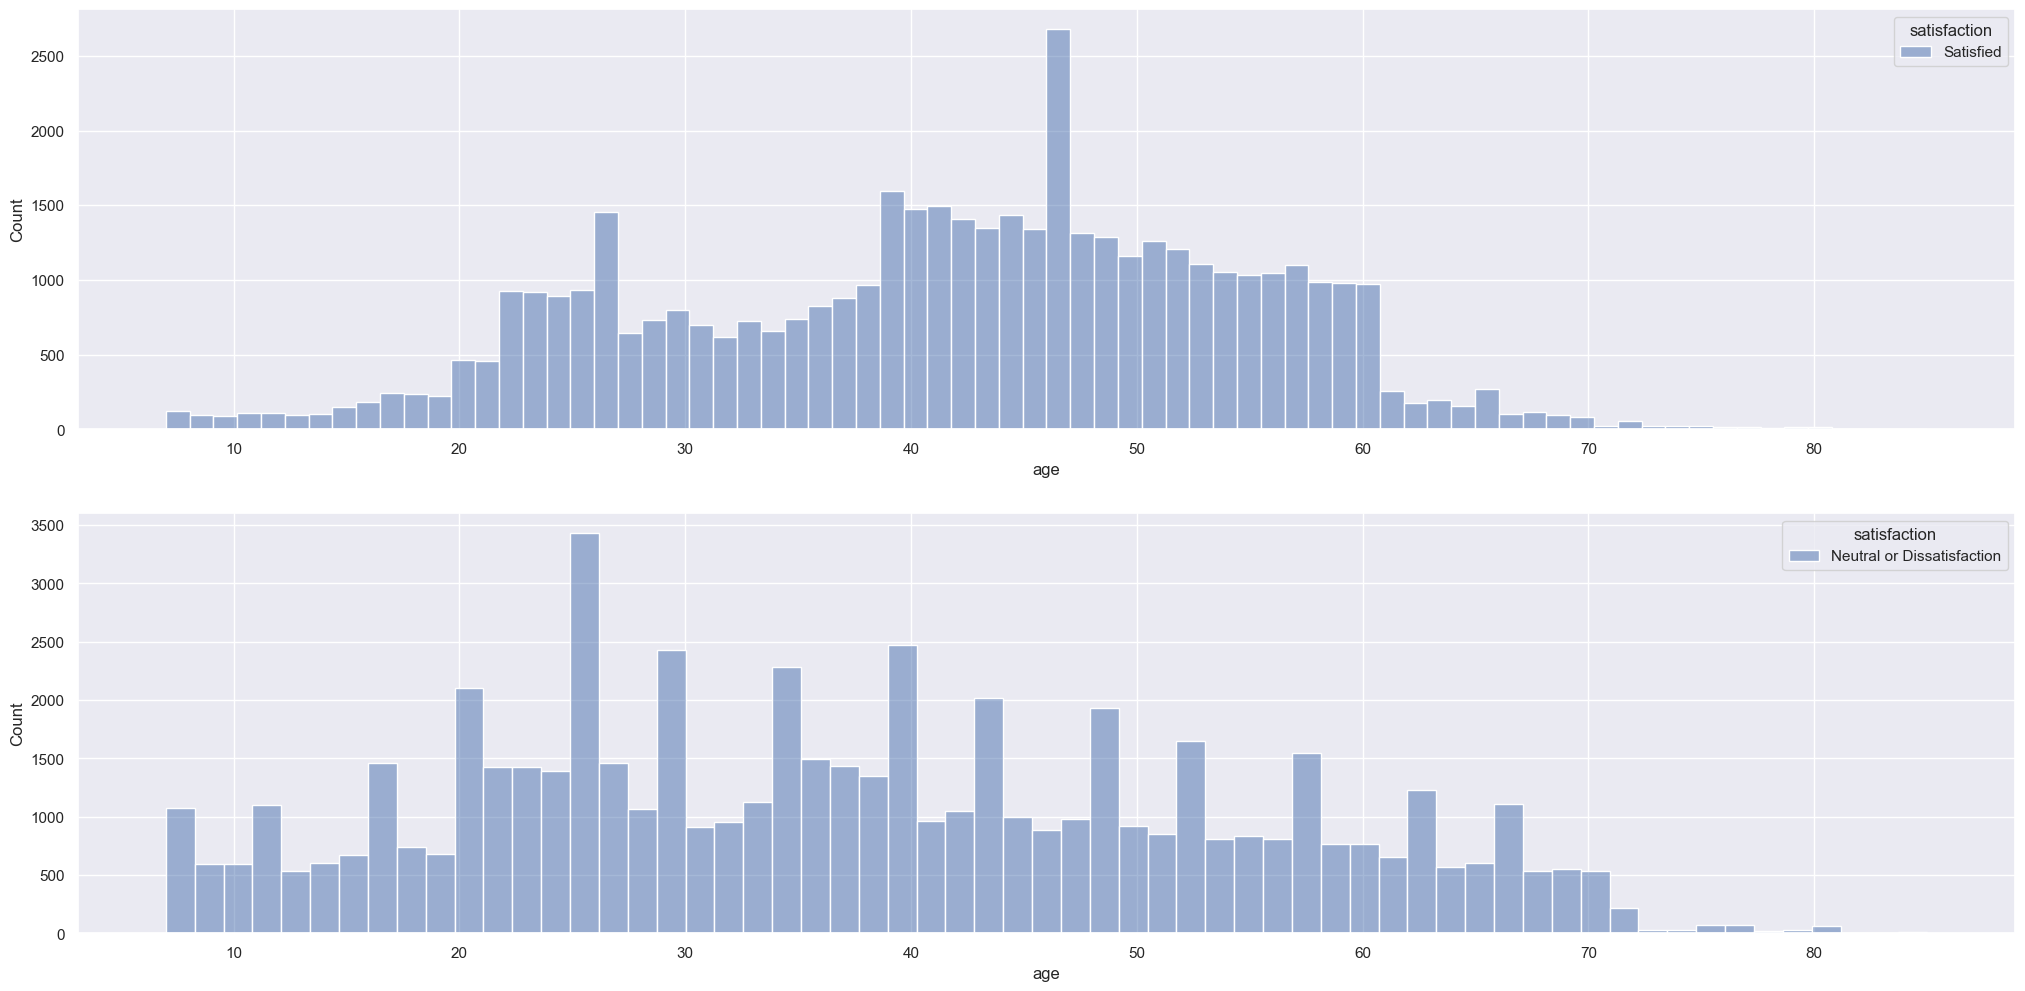

In [195]:
#Age analysis
plt.subplot(2,1,1)
sns.histplot(x='age',
             data=df3[df3['satisfaction'] == 'Satisfied'],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='age',
             data=df3[df3['satisfaction'] == 'Neutral or Dissatisfaction'],
             hue='satisfaction');





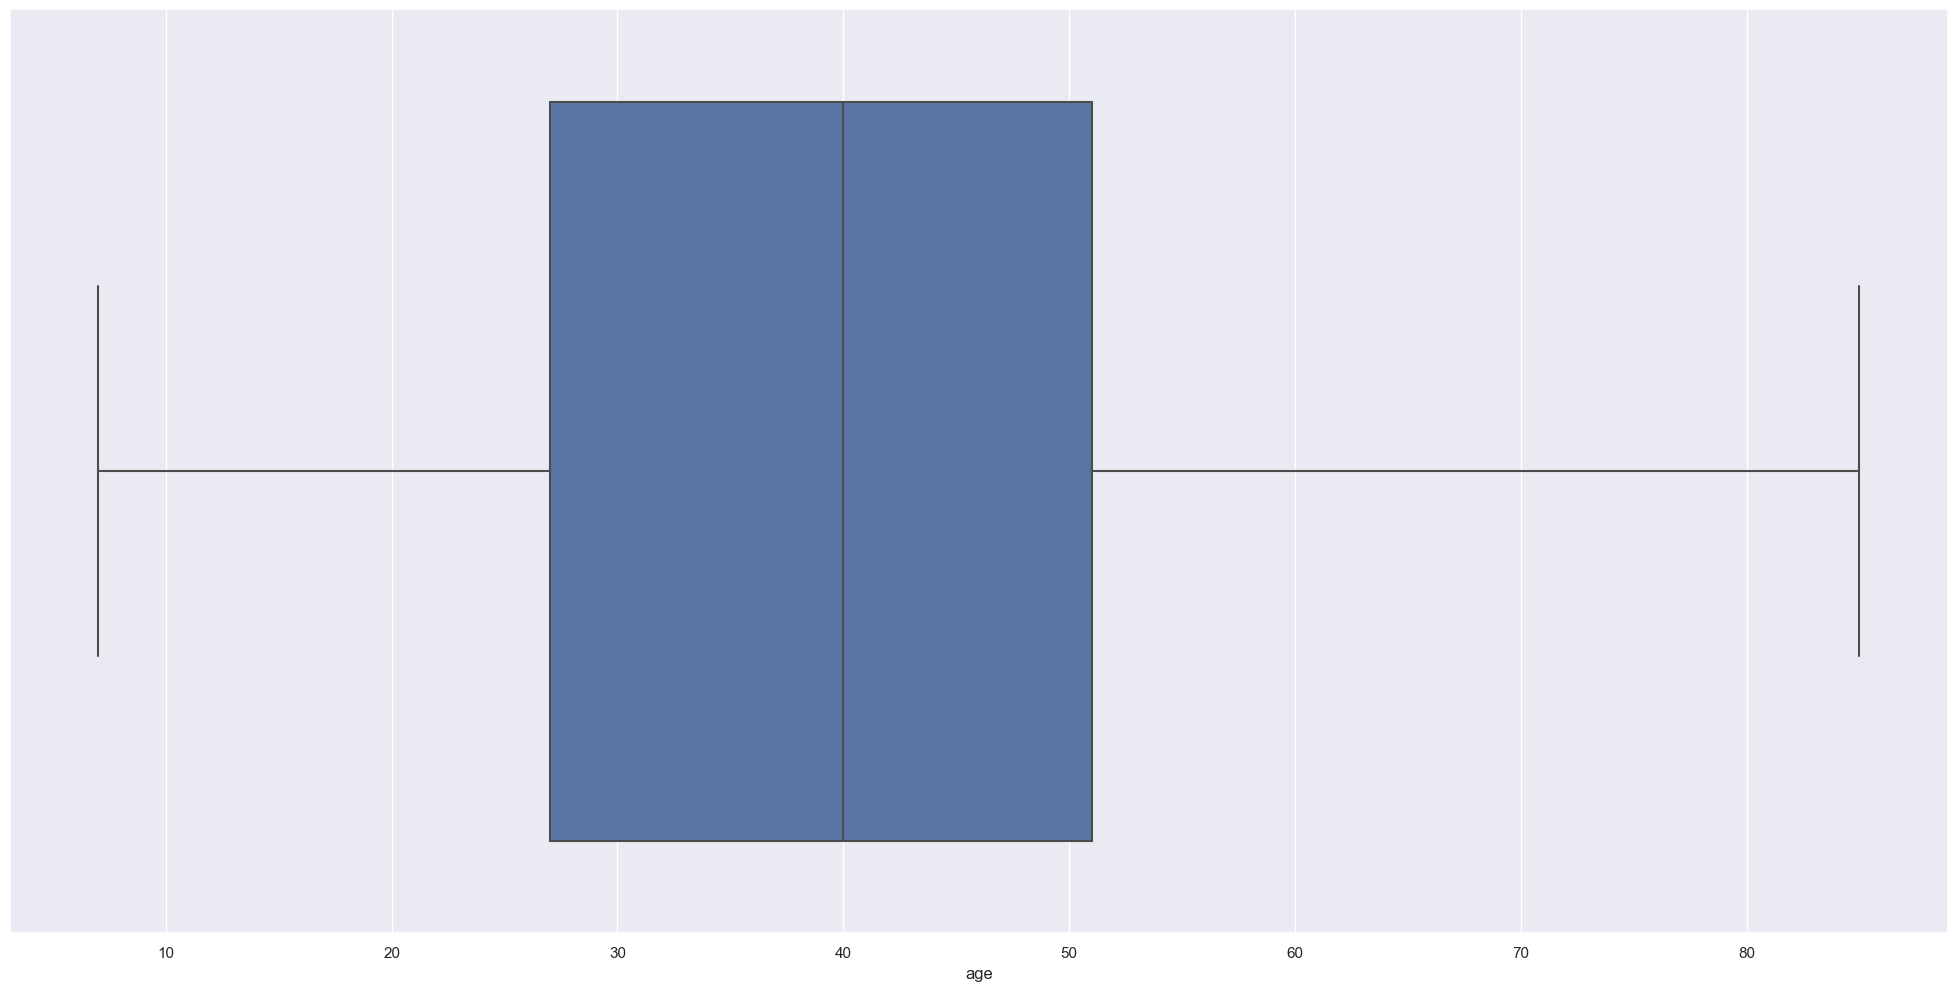

In [196]:
# PA
sns.boxplot(x='age',  data=df3);



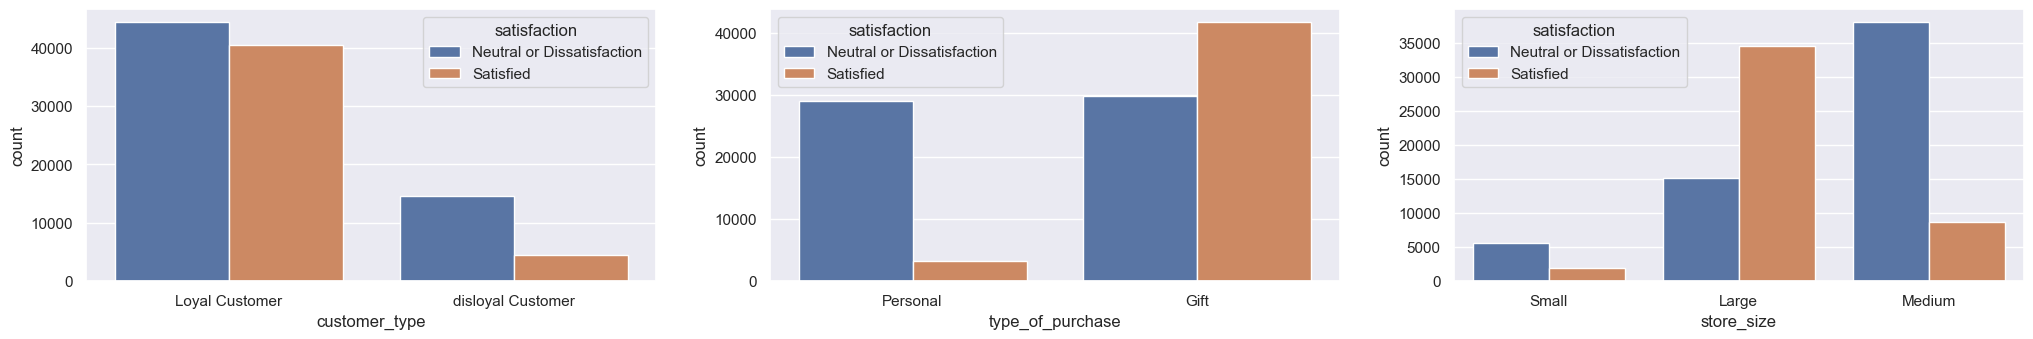

In [197]:
# Categorical analysis

plt.subplot(3,3,1)
sns.countplot(
    x='customer_type',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,2)
sns.countplot(
    x='type_of_purchase',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,3)
sns.countplot(
     x='store_size',
    hue=('satisfaction'),
    data=df3,
);



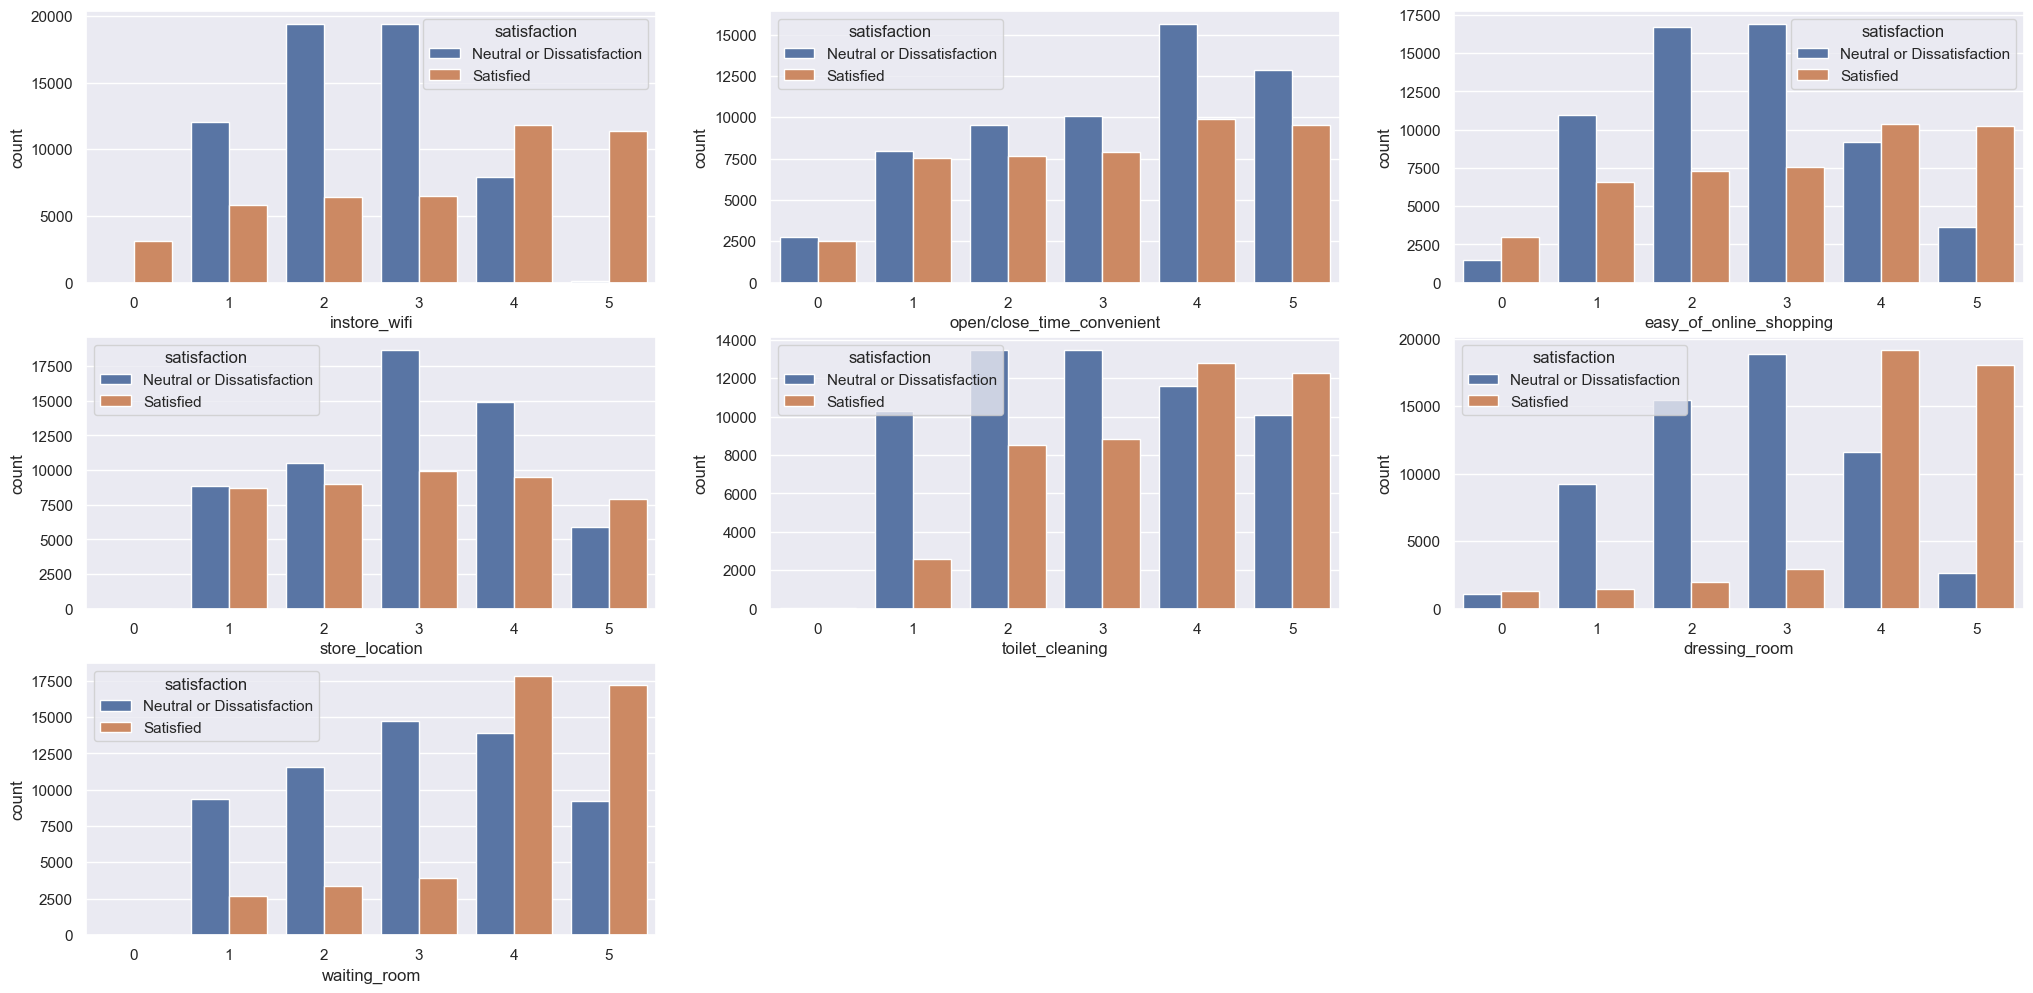

In [198]:
# Ranked analysis

plt.subplot(3,3,1)
sns.countplot(
    x='instore_wifi',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,2)
sns.countplot(
    x='open/close_time_convenient',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,3)
sns.countplot(
     x='easy_of_online_shopping',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,4)
sns.countplot(
     x='store_location',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,5)
sns.countplot(
     x='toilet_cleaning',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,6)
sns.countplot(
     x='dressing_room',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,7)
sns.countplot(
     x='waiting_room',
    hue=('satisfaction'),
    data=df3,
);



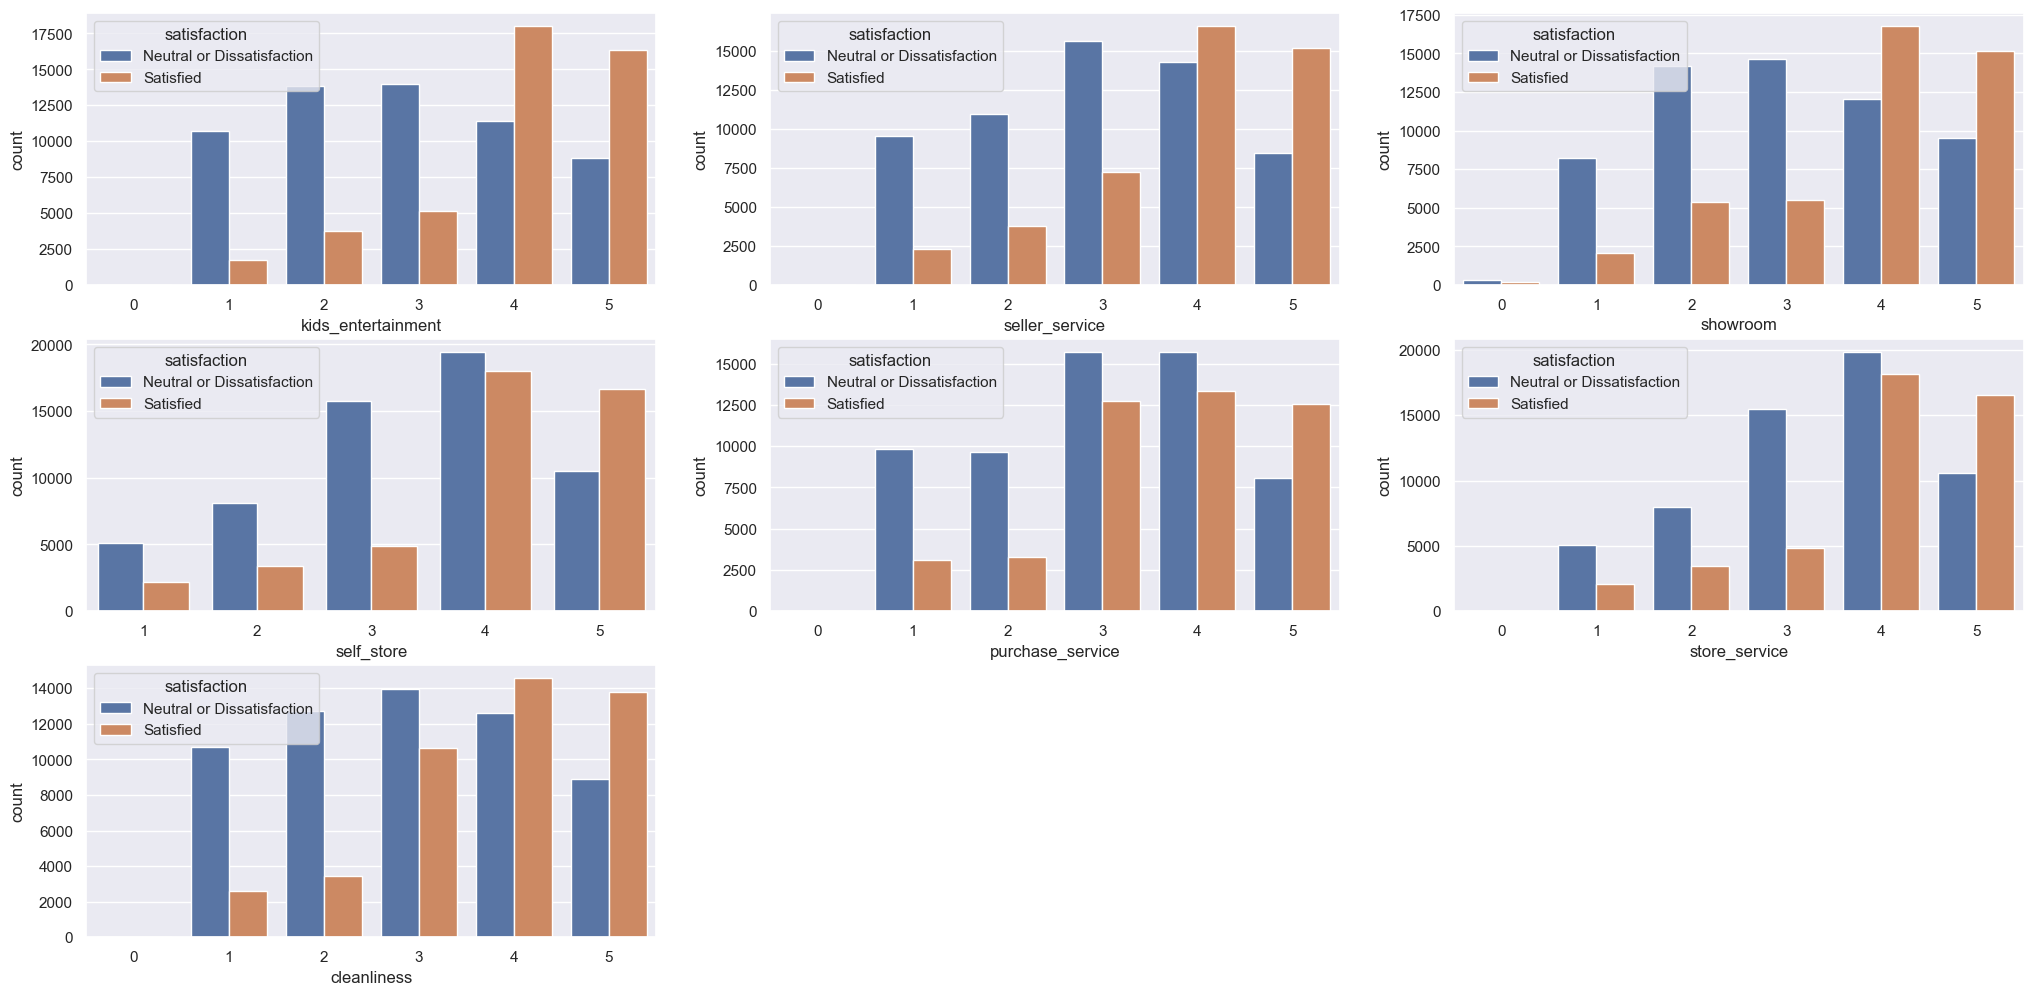

In [199]:
# Ranked analysis

plt.subplot(3,3,1)
sns.countplot(
     x='kids_entertainment',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,2)
sns.countplot(
     x='seller_service',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,3)
sns.countplot(
     x='showroom',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,4)
sns.countplot(
     x='self_store',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,5)
sns.countplot(
     x='purchase_service',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,6)
sns.countplot(
     x='store_service',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,7)
sns.countplot(
     x='cleanliness',
    hue=('satisfaction'),
    data=df3,
);

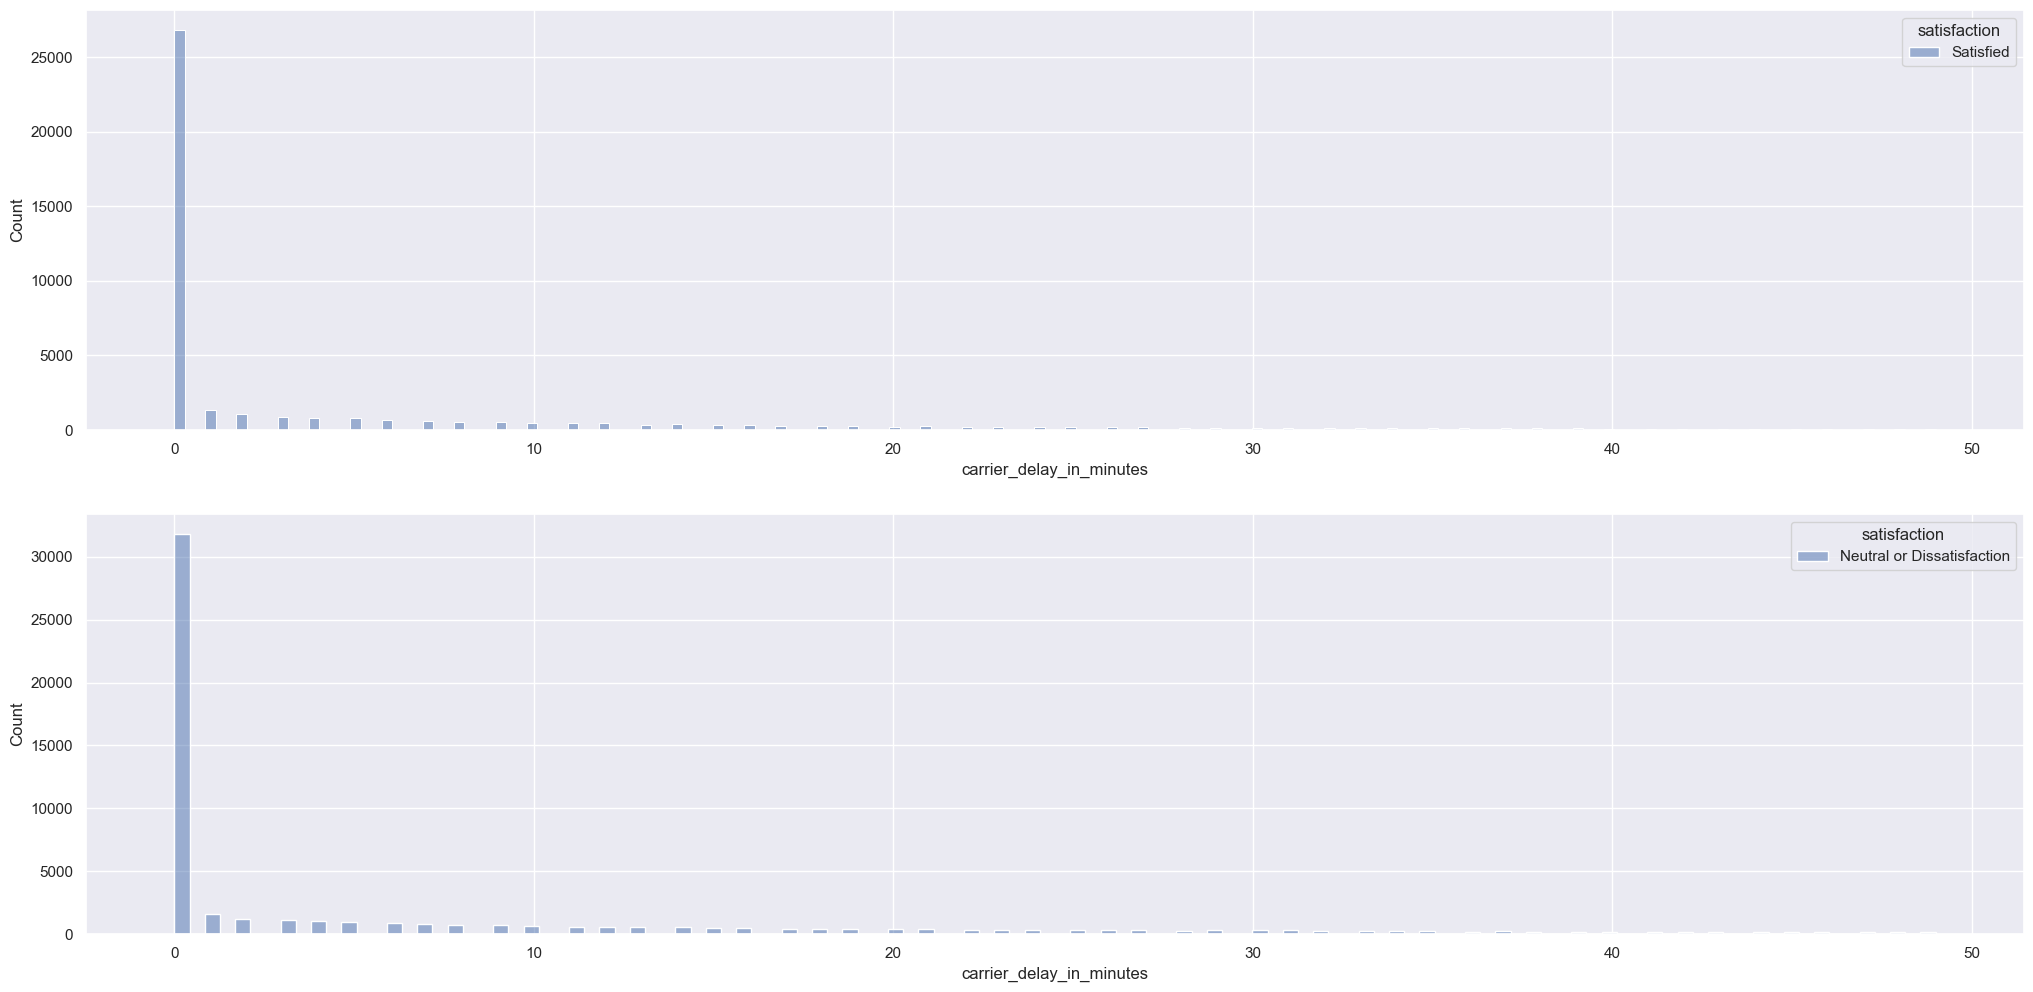

In [200]:
# 'carrier_delay_in_minutes' com tempo menor que 50 min
plt.subplot(2,1,1)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['carrier_delay_in_minutes'] < 50)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['carrier_delay_in_minutes'] < 50)],
             hue='satisfaction');

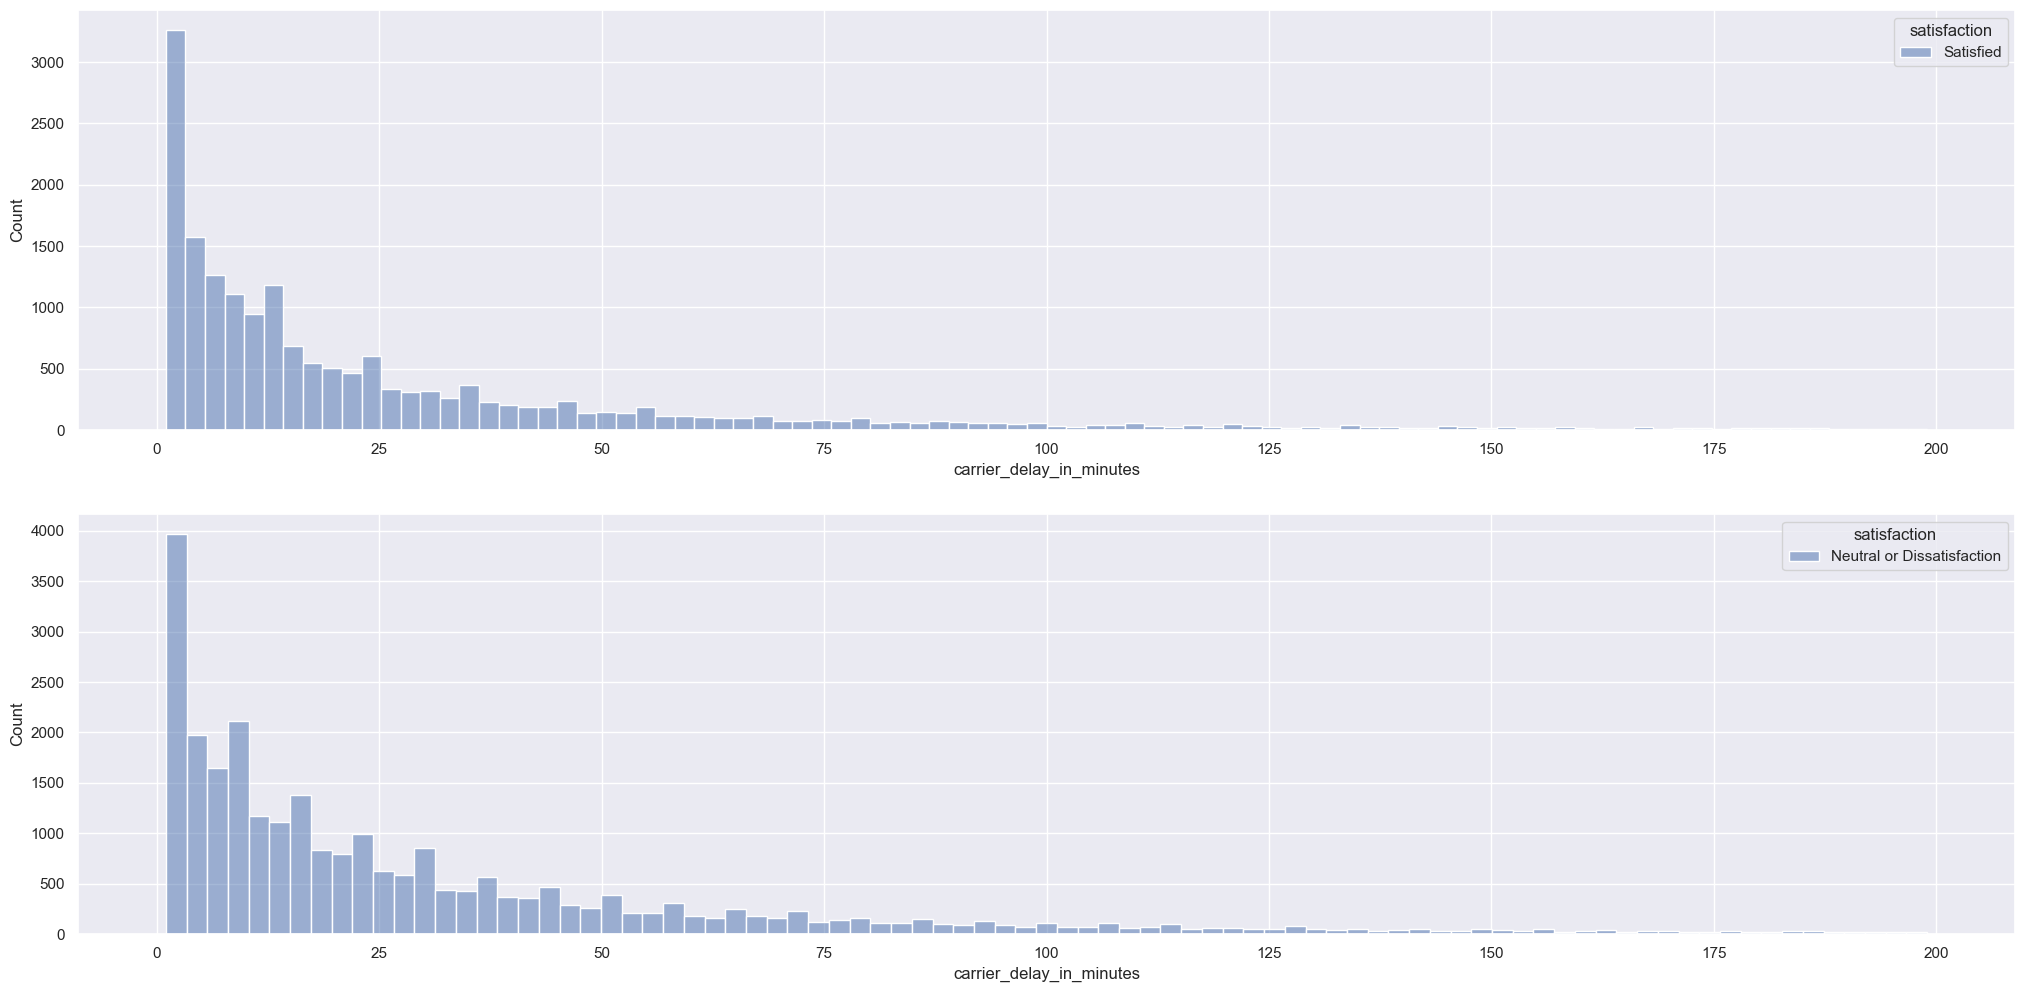

In [201]:
# 'carrier_delay_in_minutes' com tempo maior que 0 e menor que 200 min 

plt.subplot(2,1,1)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['carrier_delay_in_minutes'] > 0) & (df3['carrier_delay_in_minutes'] < 200)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['carrier_delay_in_minutes'] > 0) & (df3['carrier_delay_in_minutes'] < 200)],
             hue='satisfaction');

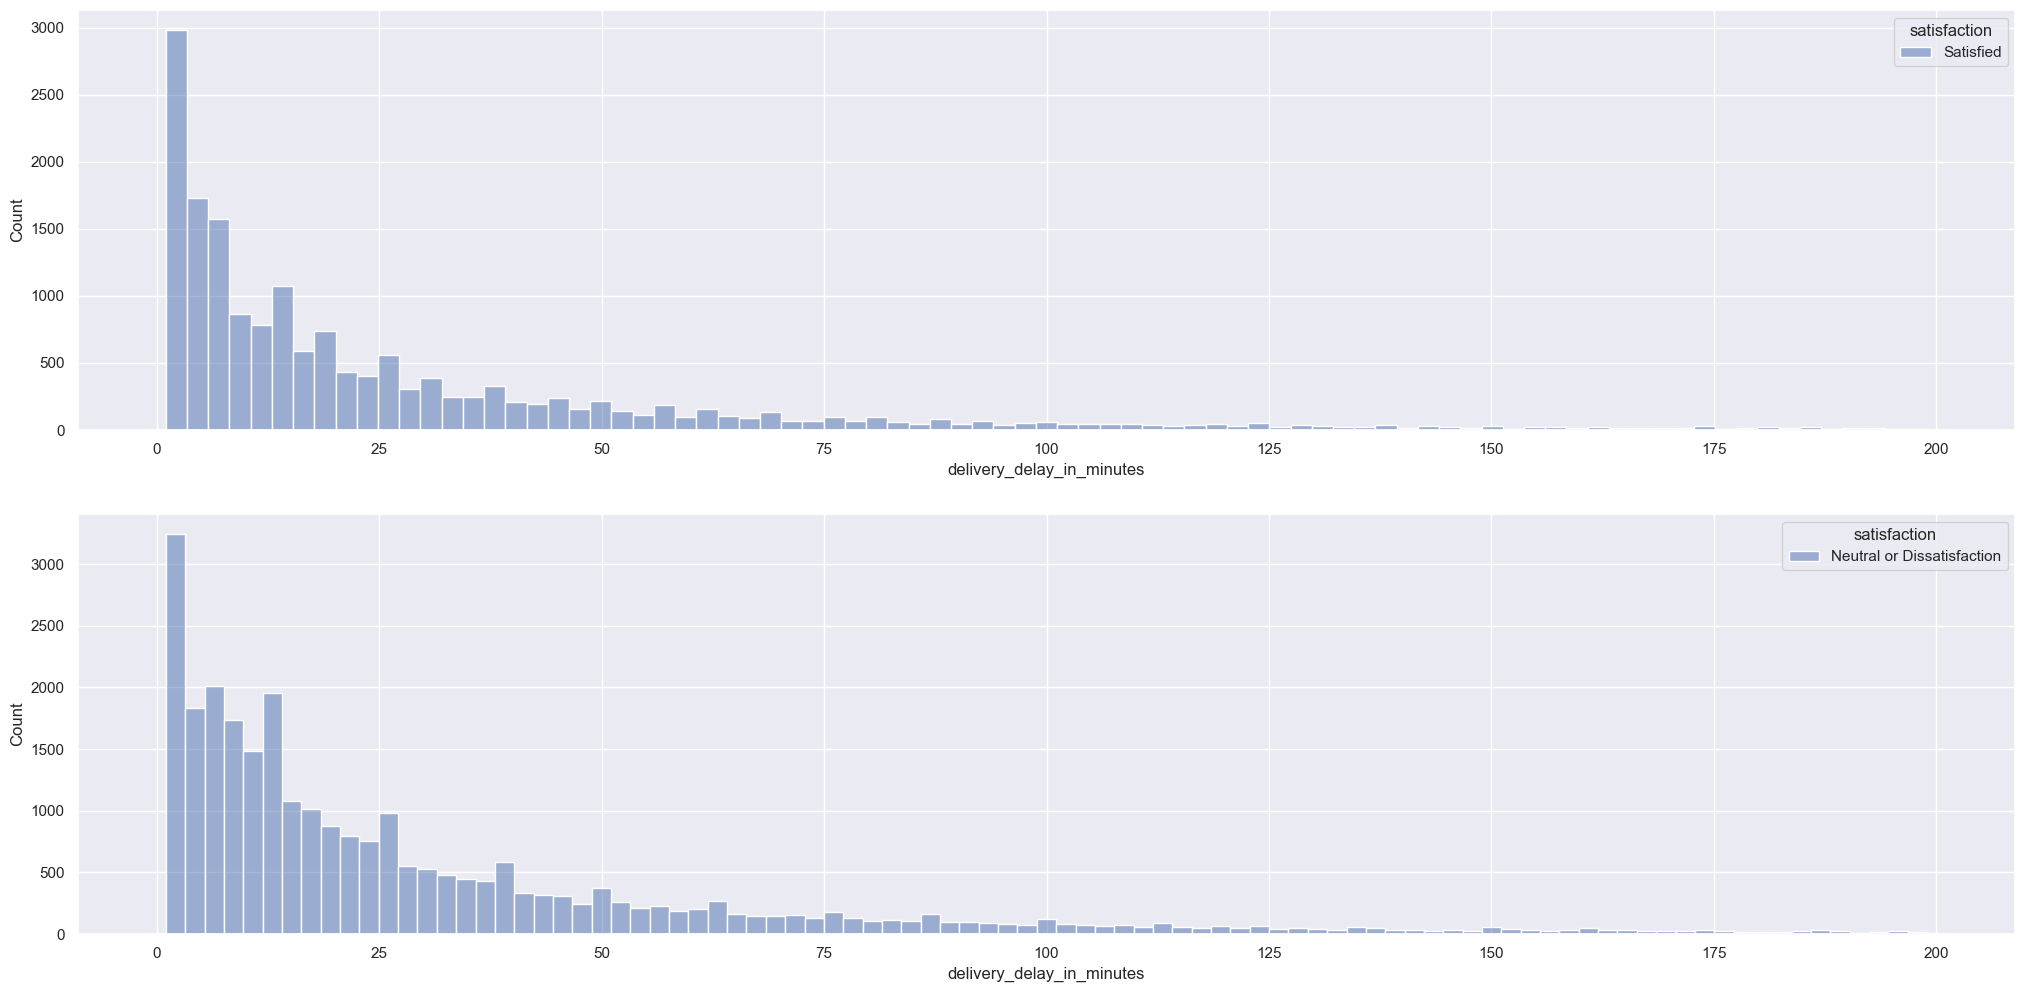

In [202]:
# 'delivery_delay_in_minutes' com tempo maior que 0 e menor que 200 min 
plt.subplot(2,1,1)
sns.histplot(x='delivery_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['delivery_delay_in_minutes'] > 0) & (df3['delivery_delay_in_minutes'] < 200)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='delivery_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['delivery_delay_in_minutes'] > 0) & (df3['delivery_delay_in_minutes'] < 200)],
             hue='satisfaction');

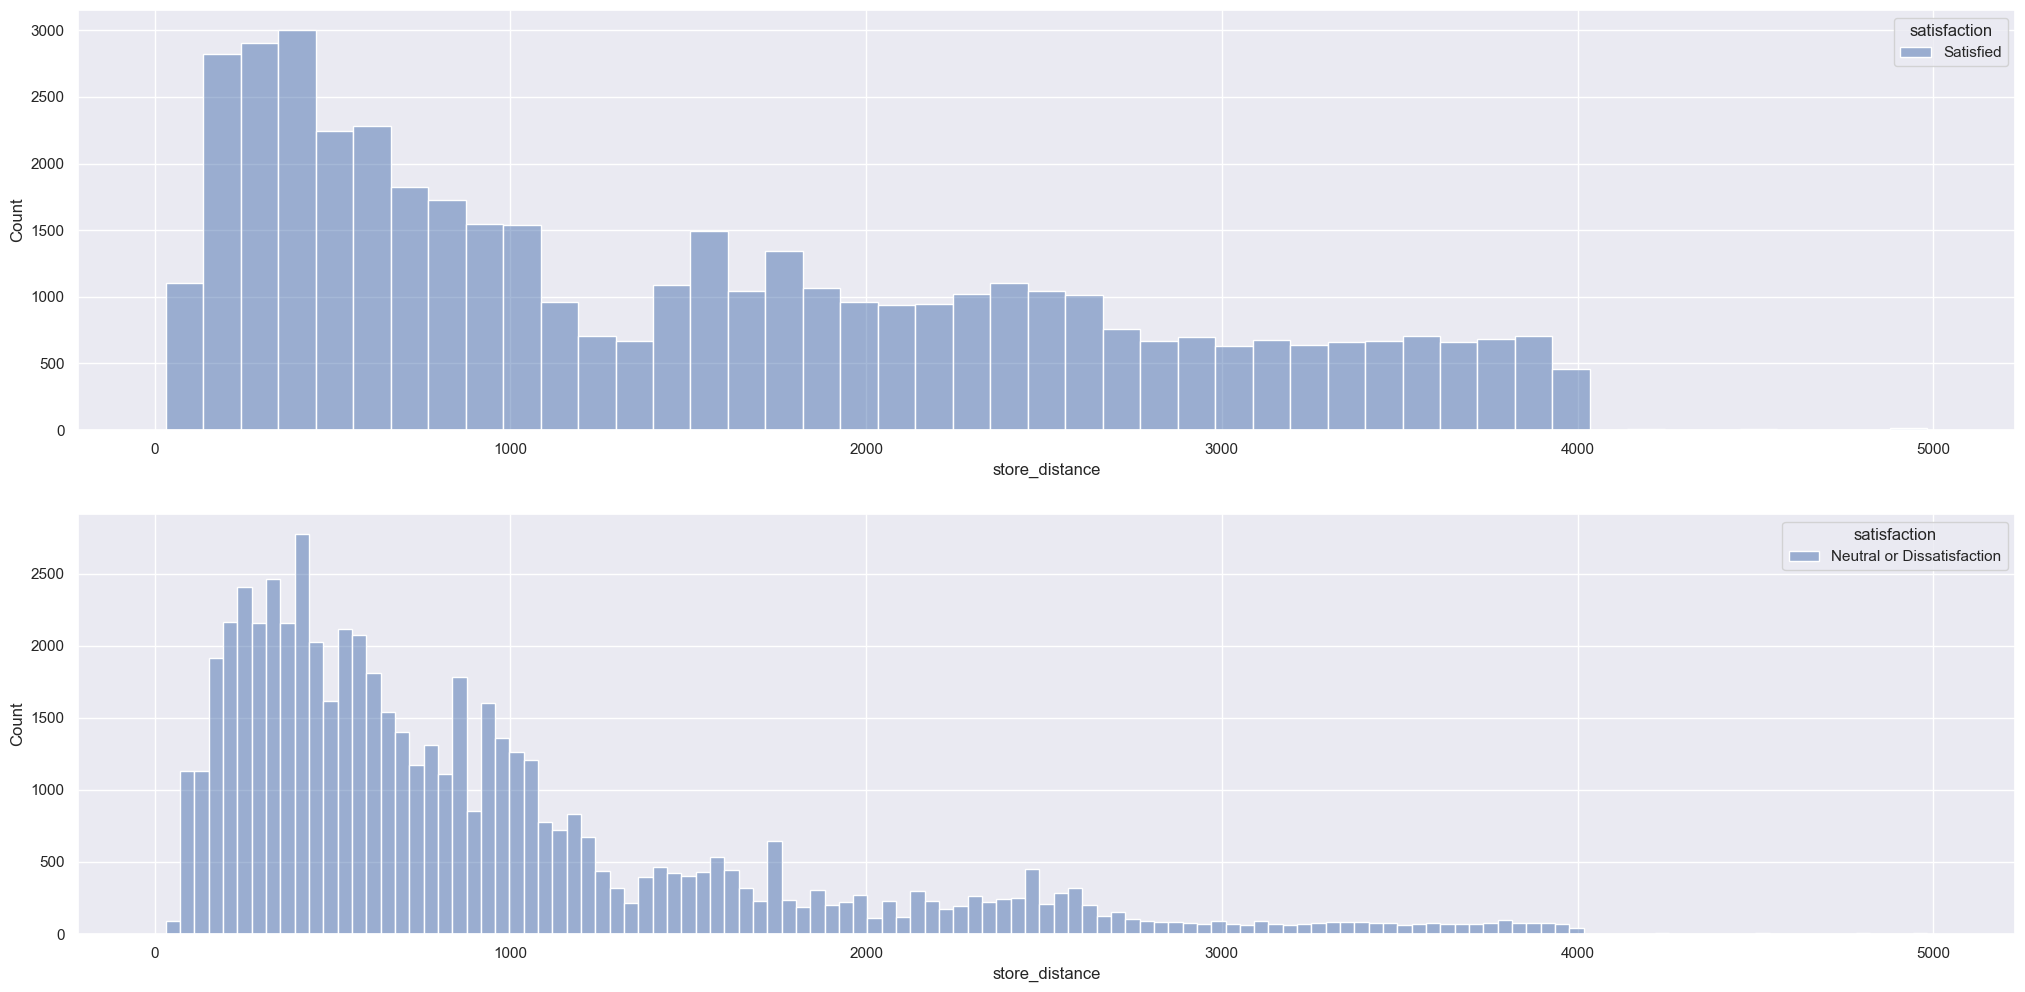

In [203]:
# Satisfação em relação à distância da loja 

plt.subplot(2,1,1)
sns.histplot(x='store_distance',
             data=df3[(df3['satisfaction'] == 'Satisfied')],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='store_distance',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction')],
             hue='satisfaction');

In [204]:
df3.head(3)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied


In [205]:
# nominal.associations(df3.drop('id',axis = 1));

# Data Preparation

In [206]:
df4 = df3.copy()
test = df1test.copy()

In [207]:
df4['satisfaction'] = df4['satisfaction'].apply( lambda x: 1 if x =='Satisfied' else 0 )

In [208]:
df4.head(1)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0


In [209]:
x = df4.drop(['id','satisfaction'], axis=1)
y = df4['satisfaction']

In [210]:
# Dividir os dados em conjuntos de treinamento e validação
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.20)
df_train = pd.concat([x_train, y_train], axis=1)
validation = pd.concat([x_val, y_val], axis=1)

### Tranformations

In [211]:
# Treino
le_gender = LabelEncoder()
df_train['gender'] = le_gender.fit_transform(df_train['gender'])

le_customer = LabelEncoder()
df_train['customer_type'] = le_customer.fit_transform(df_train['customer_type'])


le_type = LabelEncoder()
df_train['type_of_purchase'] = le_type.fit_transform(df_train['type_of_purchase'])

le_store = LabelEncoder()
df_train['store_size'] = le_store.fit_transform(df_train['store_size'])

rs = RobustScaler()
df_train['carrier_delay_in_minutes'] = rs.fit_transform(df_train[['carrier_delay_in_minutes']].values)
df_train['delivery_delay_in_minutes'] = rs.fit_transform(df_train[['delivery_delay_in_minutes']].values)

mms = MinMaxScaler()
df_train['age'] = mms.fit_transform(df_train[['age']].values)

sc = StandardScaler()
df_train['store_distance'] = sc.fit_transform(df_train[['store_distance']].values)


In [212]:
# Teste

# Usar o mesmo LabelEncoder criado para o conjunto de treinamento para transformar o conjunto de teste
test['gender'] = le_gender.transform(test['gender'])
test['customer_type'] = le_customer.transform(test['customer_type'])


test['type_of_purchase'] = le_type.transform(test['type_of_purchase'])
test['store_size'] = le_store.transform(test['store_size'])

# Usar os mesmos scalers criados para o conjunto de treinamento para transformar o conjunto de teste
test['carrier_delay_in_minutes'] = rs.transform(test[['carrier_delay_in_minutes']].values)
test['delivery_delay_in_minutes'] = rs.transform(test[['delivery_delay_in_minutes']].values)
test['age'] = sc.transform(test[['age']].values)
test['store_distance'] = sc.transform(test[['store_distance']].values)


In [213]:
# Teste

# Usar o mesmo LabelEncoder criado para o conjunto de treinamento para transformar o conjunto de teste
validation['gender'] = le_gender.transform(validation['gender'])
validation['customer_type'] = le_customer.transform(validation['customer_type'])


validation['type_of_purchase'] = le_type.transform(validation['type_of_purchase'])
validation['store_size'] = le_store.transform(validation['store_size'])

# Usar os mesmos scalers criados para o conjunto de treinamento para transformar o conjunto de validatione
validation['carrier_delay_in_minutes'] = rs.transform(validation[['carrier_delay_in_minutes']].values)
validation['delivery_delay_in_minutes'] = rs.transform(validation[['delivery_delay_in_minutes']].values)
validation['age'] = sc.transform(validation[['age']].values)
validation['store_distance'] = sc.transform(validation[['store_distance']].values)

In [214]:
df_train.head(2)

,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
5701,0,1,0.205128,0,1,-0.920906,1,0,1,3,3,1,3,3,2,3,1,4,5,3,0.0,0.000000,0
39183,0,0,0.051282,1,1,-0.591955,1,3,1,3,4,1,4,4,4,2,2,1,4,4,0.0,0.538462,0


In [215]:
x_train.head(2)

,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
5701,Female,disloyal Customer,23,Gift,Medium,272,1,0,1,3,3,1,3,3,2,3,1,4,5,3,0,0.0
39183,Female,Loyal Customer,11,Personal,Medium,600,1,3,1,3,4,1,4,4,4,2,2,1,4,4,0,7.0


### Features selection

In [216]:
# x_train = df4.drop(['id', 'satisfaction'], axis=1)
# y_train = df4['satisfaction']

# df_train = pd.concat([x_train, y_train], axis=1) # juntar as variaveis preditoras com a variavel alvo

#### ExtraTreesClassifier

In [217]:
# # model definition
# forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# # data preparation
# x_train_n = df_train.drop(['satisfaction'], axis=1)
# y_train_n = y_train.values

# forest.fit(x_train_n, y_train_n)


In [218]:
# importances = forest.feature_importances_

# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# indices = np.argsort(importances)[::-1]

# # print the feature ranking

# print('Feature ranking')

# df = pd.DataFrame()

# for i, j in zip(x_train_n, forest.feature_importances_):
    
#     aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    
#     df = pd.concat([df, aux], axis=0)
    
# print(df.sort_values('importance', ascending=False))

# # # plot the impurity-based feature importances of the forest
# # plt.figure()
# # plt.title('Feature importances')
# # plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
# # plt.xticks(range(x_train_n.shape[1]), indices)
# # plt.xlim([-1, x_train_n.shape[1]])
# # plt.show()

#### LGBM

In [219]:
# Crie e treine o modelo LGBMClassifier
lgb_model = lgb.LGBMClassifier(n_jobs=-1, random_state=42)

# data preparation
x_train = df_train.drop(['satisfaction'], axis=1)
y_train = y_train.values
lgb_model.fit(x_train, y_train)

# Obtenha as importâncias das características do modelo
importances = lgb_model.feature_importances_

# Ordene as características por importância decrescente
indices = np.argsort(importances)[::-1]

# Imprima o ranking das características
print('Feature ranking')
df = pd.DataFrame()

for i, j in zip(x_train.columns, importances):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

# São as mesmas que já selecionei

[LightGBM] [Info] Number of positive: 36001, number of negative: 47122
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433105 -> initscore=-0.269193
[LightGBM] [Info] Start training from score -0.269193
Feature ranking
                      feature  importance
0                instore_wifi         493
0                         age         282
0               customer_type         190
0                  self_store         186
0               dressing_room         162
0              store_distance         153
0                waiting_room         153
0                  store_size         150
0              store_location         146
0   

# Machine Learning

In [220]:
# cols_selected = ['type_of_purchase', 'instore_wifi', 'dressing_room', 'store_size', 'customer_type', 'age', 'customer_type',
#                  'waiting_room', 'kids_entertainment', 'showroom', 'seller_service', 'cleanliness', 'self_store' ] # ExtraTreesClassifier 

cols_selected = ['instore_wifi', 'age', 'customer_type', 'dressing_room', 'self_store', 'type_of_purchase', 'store_size', 'store_location', 'waiting_room', 
'kids_entertainment', 'store_distance', 'store_service', 'purchase_service', 'cleanliness', 'delivery_delay_in_minutes', 'showroom', 'seller_service' ] # LGB 


x_train = df_train[cols_selected]
x_teste = test[cols_selected]


In [221]:
x_train.head(2)

,instore_wifi,age,customer_type,dressing_room,self_store,type_of_purchase,store_size,store_location,waiting_room,kids_entertainment,store_distance,store_service,purchase_service,cleanliness,delivery_delay_in_minutes,showroom,seller_service
5701,1,0.205128,1,1,1,0,1,3,3,3,-0.920906,5,4,3,0.000000,3,2
39183,1,0.051282,0,1,2,1,1,3,4,4,-0.591955,4,1,4,0.538462,2,4


In [222]:
# Validação cruzada Leave One Out
kf = StratifiedKFold(n_splits = 10)

In [223]:
# Verificando a performance da Regressão Logística

lista_de_medidas = ['precision']

modelo = LogisticRegression(max_iter=1000)
accs_vc = cross_validate(modelo, x_train, y_train, cv = kf, scoring = lista_de_medidas)

In [224]:
print(accs_vc['test_precision'].mean())

0.8680845287106405


In [225]:
# MACHINE LEARNING
def MachineLearning(dataset):

    lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

    nome_das_medidas = ['acurácia', 'sensibilidade', 'vpp', 'eficiência', 'f1-score']

    lista_de_modelos = [XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3),
                        LogisticRegression(),
                        DecisionTreeClassifier(max_depth=3),
                        DecisionTreeClassifier(max_depth=5),
                        DecisionTreeClassifier(max_depth=7),
                        KNeighborsClassifier(n_neighbors=5),
                        KNeighborsClassifier(n_neighbors=15),
                        KNeighborsClassifier(n_neighbors=25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=300, max_depth=3, max_features=3),
                        RandomForestClassifier(n_estimators=300, max_depth=3, max_features=4),
                        RandomForestClassifier(n_estimators=300, max_depth=6, max_features=3),
                        RandomForestClassifier(n_estimators=300, max_depth=6, max_features=4)]  

    nome_dos_modelos = ['XGBoost',
                        'Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (prof = 3, mf = 3)',
                        'Random Forest (prof = 3, mf = 4)',
                        'Random Forest (prof = 6, mf = 3)',
                        'Random Forest (prof = 6, mf = 4)']

    resultados0 = {}

    for i in range(len(lista_de_modelos)):
        print('Rodando modelo: ' + nome_dos_modelos[i])
        accs_vc = cross_validate(lista_de_modelos[i], x_train, y_train, cv=kf, scoring=lista_de_medidas)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
    resultados = pd.DataFrame(resultados0, index=nome_das_medidas).T

    return resultados

In [226]:
MachineLearning(df_train)


Rodando modelo: XGBoost
Rodando modelo: Regressão Logística


c:\Users\Stella-PC\anaconda3\envs\Projects\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (prof = 3, mf = 3)
Rodando modelo: Random Forest (prof = 3, mf = 4)
Rodando modelo: Random Forest (prof = 6, mf = 3)
Rodando modelo: Random Forest (prof = 6, mf = 4)


,acurácia,sensibilidade,vpp,eficiência,f1-score
XGBoost,0.939860,0.914752,0.944648,0.929452,0.936897
Regressão Logística,0.873477,0.834727,0.868085,0.851070,0.868904
Árvore (prof = 3),0.884484,0.906058,0.839875,0.871705,0.887030
Árvore (prof = 5),0.905177,0.875364,0.902777,0.888848,0.901659
Árvore (prof = 7),0.929875,0.890725,0.944217,0.916682,0.925255
5-NN,0.925267,0.884809,0.939141,0.911154,0.920493
15-NN,0.923475,0.873559,0.945612,0.908154,0.917585
25-NN,0.920178,0.865615,0.945484,0.903782,0.913740
Bagging,0.959145,0.934696,0.969887,0.951962,0.956260
"Random Forest (prof = 3, mf = 3)",0.894999,0.841976,0.908915,0.874147,0.888742


# FineTunning

In [237]:
cols_selected = ['instore_wifi', 'age', 'customer_type', 'dressing_room', 'self_store', 'type_of_purchase', 'store_size', 'store_distance', 
                 'store_service', 'store_location', 'kids_entertainment', 'waiting_room', 'purchase_service' ] # LGB

x_val = validation[cols_selected]
y_val = validation['satisfaction']

# x_val = df_val[cols_selected]
# y_val = y_validation.values

In [238]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# 'base_estimator', 'bootstrap', 'bootstrap_features', 'estimator', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'

In [239]:
# Realizar o GridSearchCV para o fine-tuning
grid_search = GridSearchCV(BaggingClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_val, y_val)

# Melhor modelo encontrado após o fine-tuning
best_model_bagging = grid_search.best_estimator_

In [240]:
best_model_bagging

BaggingClassifier(bootstrap=False, max_features=0.7, max_samples=0.7,
                  n_estimators=1000)

# Resposta 
- Pós competição
- Treino bagging + finetuning

In [230]:
y_test = pd.read_csv('data/submission.csv', low_memory=False)
y_teste = y_test['Satisfaction']

In [231]:
# modelo RandomForestClassifier
bg_final = BaggingClassifier()

# x_train = df_train.drop('s', axis=1)
# y_train = df_train['cardio']

bg_final.fit(x_train, y_train)
y_pred = bg_final.predict( x_teste )

# Calculando as métricas de avaliação com base nas previsões da validação cruzada
accuracy = accuracy_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
precision = precision_score(y_teste, y_pred)
balanced_accuracy = balanced_accuracy_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)

Accuracy: 0.4949953803510933
Recall: 0.4097082883160982
Precision: 0.4925774726294303
Balanced Accuracy: 0.49479883612302067
F1 Score: 0.44733737782271654


# Kaggle

In [232]:
# modelo Bagging
def Submissao(x_train, y_train, x_teste, modelo, nome = 'submissaoPOSCHALLENGE'):
 
    modelo.fit(x_train, y_train)
    pred = modelo.predict(x_teste)

    url = 'data/test.csv' 
    subm = pd.read_csv(url, usecols = ['id'])  
    subm['satisfaction'] = pred
    
    subm.to_csv(nome + '.csv', index = False)

In [233]:
bg = BaggingClassifier()

Submissao(x_train, y_train, x_teste, modelo, nome = 'submissaoPOSCHALLENGE')